In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beakerx import *

from pycta.portfolio import Portfolio
from pycta.analysis import Analysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
form = EasyForm("Configuration")
form.addTextField("fast")
form.addTextField("slow")
form.addTextField("volatility")
form.addButton("Go!", tag="run")
form


In [5]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=int(form["fast"] or 32), slow=int(form["slow"] or 96), volatility=int(form["volatility"] or 96)))

In [6]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                        13.42
Annua Volatility                    16.03
Annua Sharpe Ratio (r_f = 0)         0.84
Max Drawdown                        48.97
Return                          47,822.82
Kurtosis                             7.79
dtype: object

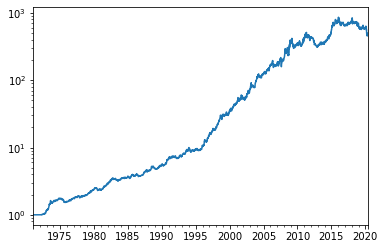

In [7]:
a.nav.plot(logy=True)
plt.show()

In [8]:
a.monthlytable

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,1.28%,-7.60%,-16.26%,1.49%,1.43%,,,,,,,,27.43%,-19.33%
2019,-12.62%,-2.41%,2.27%,2.85%,-7.51%,3.59%,3.12%,8.25%,-7.03%,-4.29%,3.33%,-1.42%,20.75%,-13.05%
2018,4.18%,-9.25%,-1.63%,-0.76%,-4.16%,2.62%,1.65%,3.66%,-1.99%,-9.06%,-2.83%,6.39%,17.19%,-11.87%
2017,-3.43%,6.72%,-2.88%,2.74%,2.59%,-2.09%,0.40%,2.50%,-0.58%,5.93%,-0.66%,6.36%,12.39%,18.28%
2016,6.42%,3.88%,-12.07%,-8.48%,-1.99%,9.32%,2.02%,-3.22%,3.86%,-8.09%,-1.41%,0.00%,22.25%,-11.43%
2015,16.93%,-1.13%,14.05%,-8.85%,4.75%,-3.85%,18.22%,-6.79%,5.49%,-8.89%,7.56%,-2.57%,33.85%,34.35%
2014,2.36%,4.48%,0.15%,2.30%,3.93%,3.67%,-2.45%,6.67%,4.42%,-1.87%,10.06%,8.71%,13.23%,50.60%
2013,1.67%,2.19%,2.11%,5.10%,1.54%,-4.77%,4.58%,-3.42%,-1.51%,4.14%,4.56%,-1.86%,11.56%,14.63%
2012,2.39%,-2.47%,-1.07%,-0.10%,-6.76%,-13.73%,4.77%,-5.09%,-2.40%,-1.41%,1.03%,-1.85%,16.48%,-24.68%


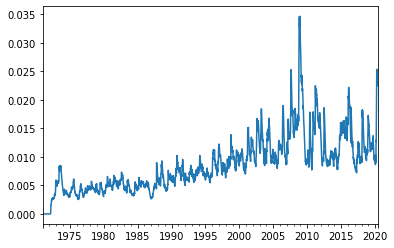

In [9]:
a.std.plot(kind="line")
plt.show()


* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.